Alejandro Burgueño Díaz. 19/08/2021

# DETECCIÓN DE FRAUDE

In [5]:
# Se cargan las librerías generales
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb 

In [2]:
archivo = "credit_card_transactions-ibm_v2.csv"

# Como es un dataset muy pesado se selecciona un número determinado de filas. 
# Podría ser selección aleatoria, pero se ha comprobado que es difícil obtener casos de No Fraude (hay pocos casos).
# En su lugar se selecciona una fila cada 2500 de manera regular.
n = 2500
num_lines = sum(1 for l in open(archivo))

# Las filas a evitar. Es preciso mantener la fila 0 del encabezado.
skip_idx = [x for x in range(1, num_lines) if x % n != 0]

# Cargar el dataset reducido
data = pd.read_csv(archivo, skiprows=skip_idx)

In [3]:
# Se analizan los datos y las frecuencias de aparición
data

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2010,2,11,07:21,$45.30,Swipe Transaction,-34551508091458520,La Verne,CA,91750.0,5912,NaN,No
1,0,0,2020,1,31,12:42,$73.42,Chip Transaction,-7146670748125200898,Monterey Park,CA,91755.0,5970,NaN,No
2,0,2,2007,10,31,20:00,$61.52,Swipe Transaction,-4500542936415012428,La Verne,CA,91750.0,5814,NaN,No
3,0,2,2017,6,25,20:26,$82.07,Chip Transaction,7069584154815291371,Palo Alto,CA,94301.0,5812,NaN,No
4,0,3,2006,8,4,06:00,$118.59,Swipe Transaction,-34551508091458520,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9749,1997,2,2015,6,3,05:44,$3.72,Chip Transaction,-5162038175624867091,Elizabeth,NJ,7201.0,5541,NaN,No
9750,1998,0,2013,10,31,22:50,$85.27,Swipe Transaction,6661973303171003879,Elizabethville,PA,17023.0,5211,NaN,No
9751,1998,0,2017,4,6,14:53,$18.39,Swipe Transaction,6098563624419731578,Lebanon,PA,17042.0,4214,NaN,No
9752,1999,1,2017,6,27,19:11,$49.97,Online Transaction,-6160036380778658394,ONLINE,NaN,NaN,4121,NaN,No


In [4]:
for column in data:
    print("---------" + column + "---------")
    print(data[column].value_counts())

---------User---------
486     33
396     32
332     28
262     27
1150    26
        ..
722      1
1670     1
839      1
738      1
1648     1
Name: User, Length: 1600, dtype: int64
---------Card---------
0    3471
1    2608
2    1722
3    1105
4     527
5     231
6      69
7      18
8       3
Name: Card, dtype: int64
---------Year---------
2016    713
2015    695
2014    687
2013    685
2019    685
2017    680
2012    652
2018    644
2011    607
2010    596
2008    533
2009    519
2007    418
2006    375
2005    273
2004    251
2003    168
2002    145
2020    128
2001     99
2000     76
1999     41
1998     33
1997     24
1996     10
1994      7
1995      6
1993      3
1992      1
Name: Year, dtype: int64
---------Month---------
3     881
1     878
7     871
6     831
12    818
10    816
8     807
2     806
11    804
5     801
9     765
4     676
Name: Month, dtype: int64
---------Day---------
6     359
10    352
16    346
7     345
15    344
1     336
22    334
18    331
23    329
3

OBSERVACIONES:
* Aunque la selección de filas es válida para el estudio ya que el porcentaje de 'es fraude'-'no es fraude' se mantiene (9741 frente a 13), siguen siendo pocos casos de 'no es fraude' para entrenar el modelo.
* Puede ser preciso codificar algunos valores en numéricos o binarios para poder ser tratados más fácilmente (por ejemplo, use chip).

# ESTUDIO SOBRE MÁS CANTIDAD DE FILAS

Como la cantidad de fraudes encontrados es muy baja, se procura trabajar con datasets mayores hasta encontrar una proporción más adecuada

In [75]:
# Repetimos el proceso anterior pero con saltos menores
archivo = "credit_card_transactions-ibm_v2.csv"
n = 1000
num_lines = sum(1 for l in open(archivo))
skip_idx = [x for x in range(1, num_lines) if x % n != 0]
big_data = pd.read_csv(archivo, skiprows=skip_idx)

In [76]:
big_data['Is Fraud?'].value_counts()

No     24353
Yes       33
Name: Is Fraud?, dtype: int64

In [21]:
# Repetimos el proceso anterior pero con saltos aún menores
archivo = "credit_card_transactions-ibm_v2.csv"
n = 10
num_lines = sum(1 for l in open(archivo))
skip_idx = [x for x in range(1, num_lines) if x % n != 0]
huge_data = pd.read_csv(archivo, skiprows=skip_idx)

In [23]:
huge_data['Is Fraud?'].value_counts()

No     2435757
Yes       2933
Name: Is Fraud?, dtype: int64

In [24]:
# Finalmente cargamos todo el dataset
whole_data = pd.read_csv(archivo)

In [26]:
whole_data['Is Fraud?'].value_counts()

No     24357143
Yes       29757
Name: Is Fraud?, dtype: int64

In [28]:
# Se extraen todas las filas de casos de fraude y las guardamos como csv para trabajar cómodamente en el futuro
fraud_data = whole_data.loc[whole_data['Is Fraud?'] == 'Yes']
fraud_data .to_csv('fraud_data.csv')                   

# CONJUNTO DE DATOS SELECCIONADO

Para tener un conjunto de datos sostenible y equilibrado, se cruzan todos los casos fraudulentos con uno de los conjuntos de datos expuestos previamente.

In [77]:
# El dataframe original de data resulta pequeño en comparación con los fraudes
# Para resolverlo se usa el conjunto Big_Data (más de 240000 casos) y se une con fraud_data (casi 30000 casos)
data = big_data
data = data.loc[data['Is Fraud?'] == 'No']
data = data.append(fraud_data)

In [78]:
data['Is Fraud?'].value_counts()

Yes    29757
No     24353
Name: Is Fraud?, dtype: int64

# PREPROCESADO DE DATOS

A continuación se modifica el tipo de dato de las columnas para poder entrenar posteriormente el modelo con datos continuos, se eliminan variables innecesarias y se hacen los remplazamientos necesarios.

In [79]:
# Amount:
# El caracter del dólar es innecesario, se debe eliminar y pasar los datos de tipo object a float.
data['Amount'] = data['Amount'].str.replace(r'$', '')
data['Amount'] = pd.to_numeric(data['Amount'])

In [80]:
# Amount:
# Se opta por pasar a numérico. Eliminando los minutos se simplifica la variable en 24 clases.
data['Time'] = data['Time'].str[:2]
data['Time'] = pd.to_numeric(data['Time'])

In [81]:
# Use Chip:
# Como hay 3 únicas clases en el dataset depurado (aunque en Kaggle se aprecia el subconjunto "others") se codifican.
data['Use Chip'] = data['Use Chip'].replace({"Swipe Transaction": 0, "Chip Transaction": 1, "Online Transaction": 2})

In [82]:
# Errors?:
# Para simplificar el dataset se considerarán todos los NaN como 0 (no hay errores) y todos los demás errores como 1.

data['Errors?'].loc[~data['Errors?'].isnull()] = 1  # not nan
data['Errors?'].loc[data['Errors?'].isnull()] = 0   # nan

C:\Users\Alejandro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [83]:
# Is Fraud?:
# También se binariza la columna, sustituyendo No por 0 y Yes por 1
data['Is Fraud?'].loc[data['Is Fraud?'] == 'No'] = 0
data['Is Fraud?'].loc[data['Is Fraud?'] == 'Yes'] = 1

In [84]:
# Merchant City y Merchant State:
# Ya que se dispone de Merchant Name, que es numérico, y dada la gran cantidad de clases, se eliminan estas columnas.
data = data.drop(['Merchant City', 'Merchant State'], axis=1)

In [85]:
# Se guarda el dataset
data.to_csv('purged_data.csv')

# ANÁLISIS DE DATOS SOBRE EL DATASET PREPROCESADO

In [6]:
data = pd.read_csv('purged_data.csv')
# Se pasan los valores a float para que las operaciones matriciales sean posibles
data = data.astype(float)

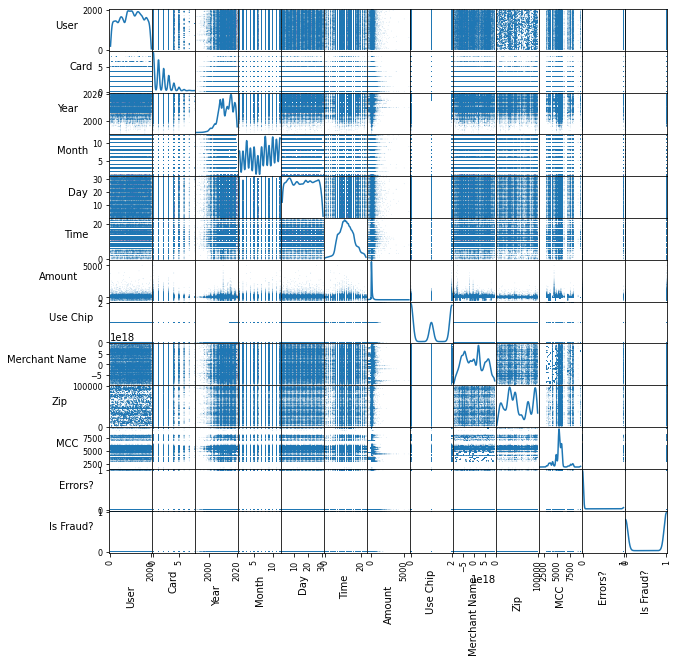

In [89]:
# Matriz de dispersión (scatter) y pares de variables
scatter_matrix = pd.plotting.scatter_matrix(
    data,
    figsize  = [10, 10],
    marker   = ".",
    s        = 1,
    diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0, ha='right') 

OBSERVACIONES: Son significativas las variables con largas colas, reflejando cierto desbalance de datos.  
* Años (Year) - Antes del 2004 habían pocas transferencias, año a partir del cual empieza a subir la tendencia y al canza su punto álgido en torno al 2012.
* Horas (Time) - La mayoría de las transferencias se realizan durante el día.
* Cantidad (Amount) - Aunque pocas, hay transferencias de valores muy elevados, alejadas de la tendencia.

<AxesSubplot:>

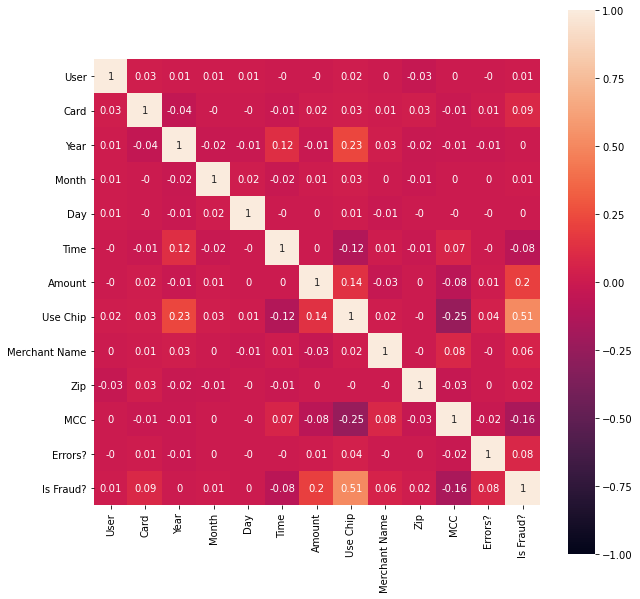

In [103]:
# Matriz de correlación
corrMatrix = data.corr()

plt.rcParams['figure.figsize'] = 10, 10
data_matrix = np.round(corrMatrix, 2)
sb.heatmap(data_matrix, annot = True, vmin=-1, vmax=1, square=True)

OBSERVACIONES: La mayoría de las variables presentan poca o escasa correlación.
* El uso de tarjetas (chip) está relacionado con el año, quizá debido a la fecha de aparición de las mismas o mayor tendencia en su uso.
* El uso de tarjetas presenta una correlación relevante con los casos de fraude.

# COMPARACIÓN DE PARES DE VARIABLES

Este tipo de análisis resulta de utilidad para visualizar situaciones en que NUNCA se han dado anomalías. 
Dicha comparación anticipa los resultados de las reglas de inferencia.

In [90]:
data_in = data.loc[data['Is Fraud?'] == 0]
data_out = data.loc[data['Is Fraud?'] == 1]

In [91]:
def compare (x,y):
    plt.scatter(data_in[x], data_in[y] )
    plt.scatter(data_out[x], data_out[y], linewidths=5, c='red' )

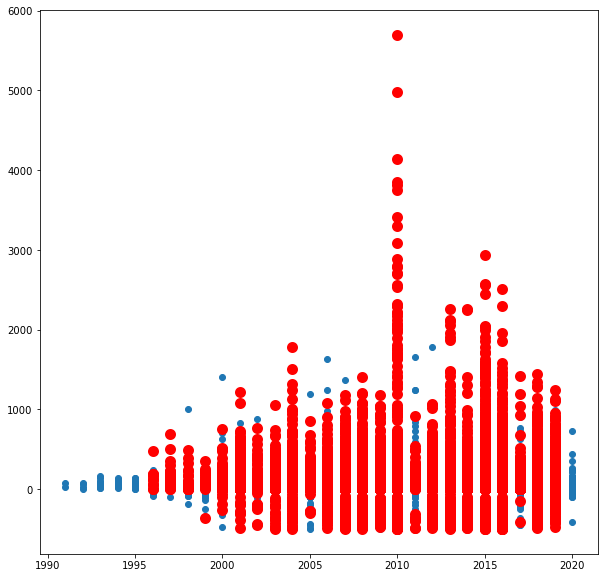

In [92]:
compare('Year','Amount')

OBSERVACIONES: 
* Antes del año 1995 no se aprecian transferencias fraudulentas. En el resto del conjunto de datos se aprecia fraude bajo cualquier cantidad económica.
* Se sobreentiende que el dataset no contiene datos actualizados, al no presentar movimientos fraudulentos en el 2020.
* Los movimientos de mayor importe se realizan en el 2010, posiblemente relacionado con la crisis económica.
* Cabe destacar que en los años 1998, 2000, 2005, 2006, 2007, 2011 y 2012 los movimientos de mayor importe nunca son fraudulentos o no eran detectados.

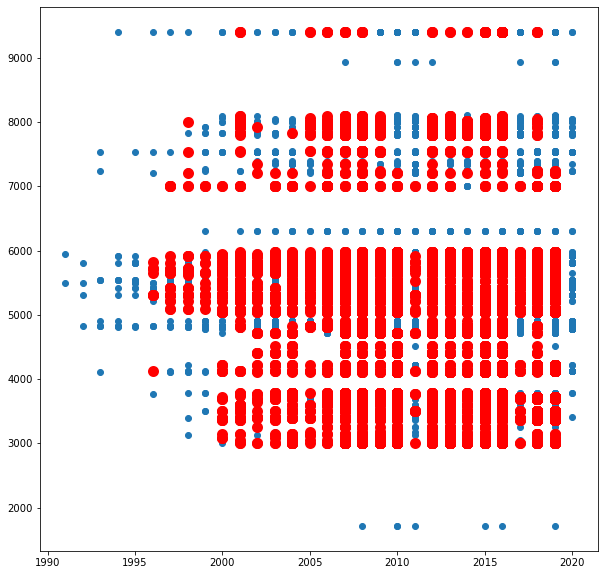

In [93]:
compare('Year','MCC')

OBSERVACIONES: Hay determinadas categorías de códigos mercantiles (MCC) que nunca son fraudulentas, muy aisladas del resto.

# DESARROLLO DEL MODELO DE MACHINE LEARNING

A menudo son útiles métodos de Aprendizaje No Supervisado para resolver problemas de detección de fraude.  
Esta solución es interesante cuando no existen ejemplos en que el fraude ha sido detectado, es decir, cuando la única manera de predecir el fraude es a través de consideración de datos anómalos en función de la estructura de los datos, la agrupación, la desviación estándar, la exclusión de los cuartiles o el desbalance de los datos.  
En tales casos se emplean métodos como Isolation Forest o LOF (Local Outlier Factor), sin embargo, como en este dataset se dispone de casos etiquetados como fraudulentos se realizará un estudio sobre modelos de Aprendizaje Supervisado.

In [115]:
# Se cargan las librerías de Machine Learning
import random
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from dtreeviz.trees import *
from IPython.core.display import display, HTML

In [140]:
# Se aislan las variables de entrada 'X' de la variable predictora 'y', la que queremos hallar
X = data.drop('Is Fraud?', axis=1)     # Variables 'X', todas menos la etiqueta 'Is Fraud', la variable predictora
y = data['Is Fraud?']                  # Variable 'y', la etiqueta binaria 'Is Fraud'

# Se convierten las variables a numpy para posteriormente poder aplicar reshape y adaptar su dimensión
X = np.nan_to_num(X)
y = np.nan_to_num(y)

# Finalmente, para evitar overfitting se dividen el conjunto de datos en conjunto de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test = X_test.reshape(-X_test.shape[0],X_test.shape[1])    #Reshape de X_test para poder introducirlo

In [98]:
def metricas ():
    print("-----------------------------------------------------")
    print('Métricas de error:')
    print('MAE', metrics.mean_absolute_error(y_test, y_pred))  
    print('MSE', metrics.mean_squared_error(y_test, y_pred))  
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Score:', clf.score(X_test, y_test))
    print("-----------------------------------------------------")
    print('Matriz de Confusión:')
    print(metrics.confusion_matrix(y_test, y_pred))
    print("-----------------------------------------------------")
    print('Report:')
    print(metrics.classification_report(y_test, y_pred))

In [99]:
print("RANDOM FOREST")
clf = RandomForestClassifier(max_depth=20, n_estimators = 900, criterion = 'gini', random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metricas()

RANDOM FOREST
-----------------------------------------------------
Métricas de error:
MAE 0.06144890038809832
MSE 0.06144890038809832
RMSE: 0.24788888718153204
Score: 0.9385510996119016
-----------------------------------------------------
Matriz de Confusión:
[[4614  244]
 [ 421 5543]]
-----------------------------------------------------
Report:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      4858
         1.0       0.96      0.93      0.94      5964

    accuracy                           0.94     10822
   macro avg       0.94      0.94      0.94     10822
weighted avg       0.94      0.94      0.94     10822



In [100]:
print("SVM RBF KERNEL")
clf = svm.SVC(kernel="rbf")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metricas()

SVM RBF KERNEL
-----------------------------------------------------
Métricas de error:
MAE 0.4358713731288117
MSE 0.4358713731288117
RMSE: 0.660205553694311
Score: 0.5641286268711884
-----------------------------------------------------
Matriz de Confusión:
[[1319 3539]
 [1178 4786]]
-----------------------------------------------------
Report:
              precision    recall  f1-score   support

         0.0       0.53      0.27      0.36      4858
         1.0       0.57      0.80      0.67      5964

    accuracy                           0.56     10822
   macro avg       0.55      0.54      0.51     10822
weighted avg       0.55      0.56      0.53     10822



In [101]:
print("K NEAREST NEIGHBORS")
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metricas()

K NEAREST NEIGHBORS
-----------------------------------------------------
Métricas de error:
MAE 0.11042321197560524
MSE 0.11042321197560524
RMSE: 0.3322998825994455
Score: 0.8895767880243948
-----------------------------------------------------
Matriz de Confusión:
[[4321  537]
 [ 658 5306]]
-----------------------------------------------------
Report:
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      4858
         1.0       0.91      0.89      0.90      5964

    accuracy                           0.89     10822
   macro avg       0.89      0.89      0.89     10822
weighted avg       0.89      0.89      0.89     10822



In [102]:
print("MULTI LAYER PERCEPTRON (2 capas ocultas)")
clf = MLPClassifier(random_state=1, max_iter=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metricas()

MULTI LAYER PERCEPTRON (2 capas ocultas)
-----------------------------------------------------
Métricas de error:
MAE 0.49574939937165036
MSE 0.49574939937165036
RMSE: 0.7040947374974836
Score: 0.5042506006283497
-----------------------------------------------------
Matriz de Confusión:
[[2522 2336]
 [3029 2935]]
-----------------------------------------------------
Report:
              precision    recall  f1-score   support

         0.0       0.45      0.52      0.48      4858
         1.0       0.56      0.49      0.52      5964

    accuracy                           0.50     10822
   macro avg       0.51      0.51      0.50     10822
weighted avg       0.51      0.50      0.51     10822



OBSERVACIONES: El modelo que presenta un mejor rendimiento es Random Forest, con un accuracy de 0.94 y las métricas de error más bajas. K nearest neighbours también resulta en un modelo con pocos FP y FN, pero sigue clasificando mejor Random Forest.
Cabe destacar que para esta prueba no se han realizado métodos de búsqueda de hiperparámetros que podrían haber mejorado el rendimiento de los modelos (como búsqueda por rejilla o búsqueda aleatoria).

# REGLAS DE INFERENCIA

Puede resultar útil extraer reglas de inferencia de modelos caja blanca, como los árboles de decisión o la regresión lineal. En este caso, aprovechando que Random Forest es el modelo que resulta más efectivo entre los testados, se estudian las reglas de inferencia de uno de los árboles que lo componen.

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

feature_names = list(data.drop('Is Fraud?', axis=1).columns)

viz = dtreeviz(clf.estimators_[0], 
               X,
               y,
               target_name='Is Fraud?',
               feature_names = feature_names, 
               class_names=["Not Fraud", "Fraud"],
               scale=2,
               histtype= 'barstacked')  
viz

<img src="ReglaInferencia.jpg">

OBSERVACIONES: La variable Zip resulta muy relevante a la hora de clasificar fraude, siendo los valores por debajo de 510 un gran estimador de fraude. 
Además de las observaciones emitidas en apartados anteriores ('comparación de pares de variables') las reglas de inferencia resultan útiles para aproximar la pronosticación de casos novedosos de manera sencilla.